In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

$Mall customer data$

- It has four columns having CustomerID, Gender , Age, Income and Spending score

- Spending score between 1 to 100

- More spending score means more valuable customer

- Income and Spending score are the important variables

In [3]:
df=pd.read_csv("D:\\data\\Mall_customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Select only income and Spending score columns

X=df.iloc[:,[3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [5]:
X=df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# K-means

- Generally we need to decide the numbers of clusters
- Elbow methods 
- within sum of squares 
- we randomly give 10 clusters, for each cluster will calculate within sum of square 

from sklearn.cluster import KMeans

### first we check for one cluster to understand within sum of squares 

In [6]:
from sklearn.cluster import KMeans
kmeans_1=KMeans(n_clusters=1,max_iter=300,random_state=12345)
kmeans_1

KMeans(n_clusters=1, random_state=12345)

In [7]:
kmeans_1.fit(X)

C:\Users\visha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=1, random_state=12345)

In [8]:
kmeans_1.inertia_ # within sum of squares 

269981.28

#### Try to identify optimal clusters using elbow method

In [9]:
wss=[] # within sum square
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,max_iter=300,random_state=12345)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

C:\Users\visha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
wss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37239.835542456036,
 30273.394312070042,
 25028.020475269415,
 21884.744095710274]

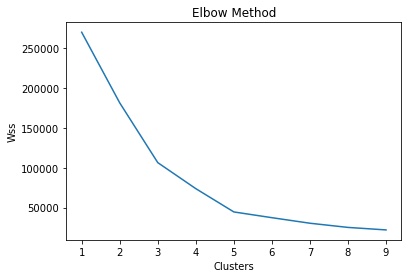

In [11]:
plt.plot(range(1,10),wss)
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("Wss")
plt.show()

In [22]:
# after 5 cluster variance is less 
# and become constant

#### Using elbow method we decided number of clusters are 5

In [12]:
kmeans=KMeans(n_clusters=5,max_iter=300,random_state=1234)
y_clusters=kmeans.fit_predict(X)
y_clusters

# Here 0= cluster_1 and 4 = cluster_5

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [14]:
df['Cluster_group']=y_clusters

In [15]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [16]:
df['Cluster_group'].value_counts()

4    81
1    39
2    35
0    23
3    22
Name: Cluster_group, dtype: int64

In [18]:
# Cluster-1 group data
cs_1=df[df['Cluster_group']==0].iloc[:,[3,4]]
cs_2=df[df['Cluster_group']==1].iloc[:,[3,4]]
cs_3=df[df['Cluster_group']==2].iloc[:,[3,4]]
cs_4=df[df['Cluster_group']==3].iloc[:,[3,4]]
cs_5=df[df['Cluster_group']==4].iloc[:,[3,4]]

(array([6., 0., 4., 2., 0., 0., 2., 3., 4., 2.]),
 array([ 3. ,  6.7, 10.4, 14.1, 17.8, 21.5, 25.2, 28.9, 32.6, 36.3, 40. ]),
 <BarContainer object of 10 artists>)

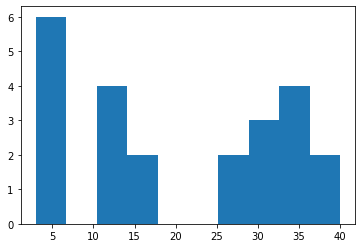

In [19]:
plt.hist(cs_1['Spending Score (1-100)'])

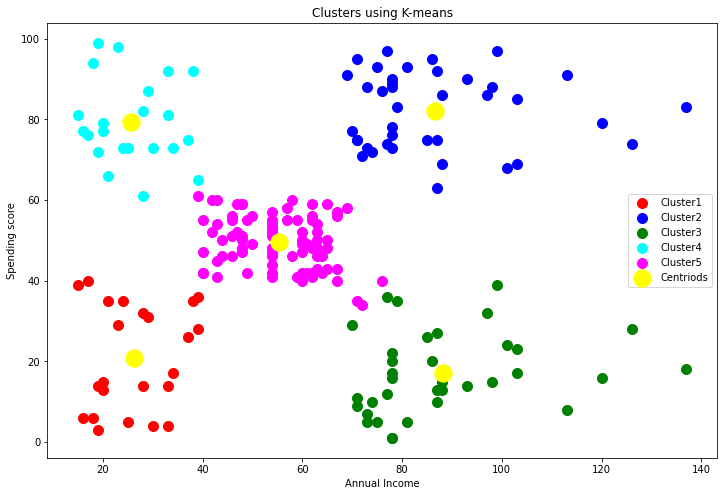

In [20]:
# Visulaize the clusters
# We are applying scatter plot between income and spending score w.r.t to clusters
plt.figure(figsize=(12,8))
plt.scatter(X[y_clusters==0,0],X[y_clusters==0,1],s=100,c='red',label="Cluster1")
plt.scatter(X[y_clusters==1,0],X[y_clusters==1,1],s=100,c='blue',label="Cluster2")
plt.scatter(X[y_clusters==2,0],X[y_clusters==2,1],s=100,c='green',label="Cluster3")
plt.scatter(X[y_clusters==3,0],X[y_clusters==3,1],s=100,c='cyan',label="Cluster4")
plt.scatter(X[y_clusters==4,0],X[y_clusters==4,1],s=100,c='magenta',label="Cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centriods')
plt.title("Clusters using K-means")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

# Hierarchical   Cluster

In [21]:
import scipy.cluster.hierarchy as sch

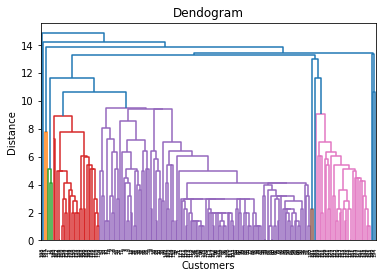

In [22]:
# Dendogram using Single
dendogram=sch.dendrogram(sch.linkage(X,method='single'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

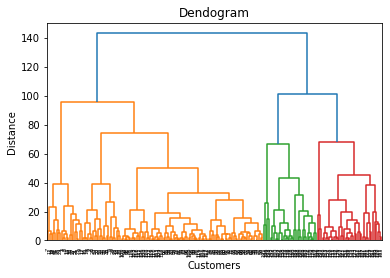

In [23]:
dendogram=sch.dendrogram(sch.linkage(X,method='complete'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

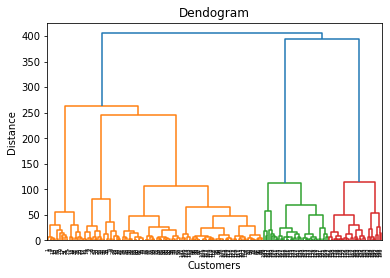

In [24]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

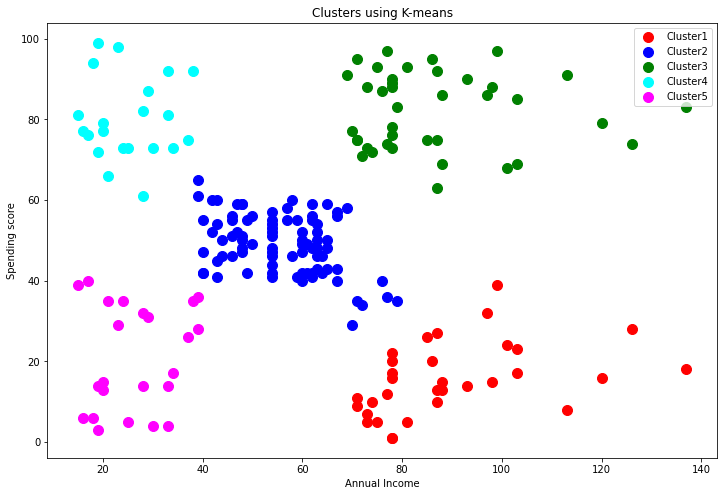

In [26]:
# Visulaize the clusters
# We are applying scatter plot between income and spending score w.r.t to clusters
plt.figure(figsize=(12,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label="Cluster1")
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label="Cluster2")
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='green',label="Cluster3")
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='cyan',label="Cluster4")
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='magenta',label="Cluster5")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centriods')
plt.title("Clusters using K-means")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()